In [1]:
import polars as pl
from cynde.functional.train.results import merge_results, merge_metrics,aggr_metrics_by_inputs, save_results


In [2]:
metrics = r"C:\Users\Tommaso\Documents\Dev\Cynde\cynde_mount\tgate_with_moldes_metrics_20240517-134036.parquet"
results = r"C:\Users\Tommaso\Documents\Dev\Cynde\cynde_mount\tgate_with_moldes_results_20240517-134036.parquet"
metrics_df = pl.read_parquet(metrics)
results_df = pl.read_parquet(results)

In [20]:
def aggr_metrics_by_input_by_test_fold(metrics_df:pl.DataFrame):
    metrics_columns = ["train_accuracy","train_mcc","val_accuracy","val_mcc","test_accuracy","test_mcc"]
    return metrics_df.group_by("feature_set_name","classifier_id","r_outer","k_outer").agg(pl.mean(metrics_columns),pl.len())
def aggr_metrics_by_inputs(metrics_df:pl.DataFrame):
    metrics_columns = ["train_accuracy","train_mcc","val_accuracy","val_mcc","test_accuracy","test_mcc"]
    return metrics_df.group_by("feature_set_name","classifier_id").agg(pl.mean(metrics_columns),pl.std(metrics_columns).name.suffix("_std"),pl.len())

In [22]:
aggr_metrics_by_inputs(metrics_df).sort("test_mcc")

feature_set_name,classifier_id,train_accuracy,train_mcc,val_accuracy,val_mcc,test_accuracy,test_mcc,train_accuracy_std,train_mcc_std,val_accuracy_std,val_mcc_std,test_accuracy_std,test_mcc_std,len
str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,u32
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",0.777497,0.555552,0.721947,0.444694,0.521556,0.066662,0.00832,0.016648,0.026087,0.052223,0.063603,0.125287,1250
"""COMPOUND_NAME_moldes_embedding…","""bootstrap_True_ccp_alpha_0.0_c…",1.0,1.0,0.829752,0.659987,0.650415,0.307693,0.0,0.0,0.021545,0.043191,0.032212,0.061502,1250
"""DOSE_LEVEL_text-embedding-3-la…","""bootstrap_True_ccp_alpha_0.0_c…",1.0,1.0,0.831411,0.663322,0.651946,0.31238,0.0,0.0,0.021669,0.043455,0.029698,0.052989,1250
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",1.0,1.0,0.833226,0.666948,0.674355,0.355796,0.0,0.0,0.021831,0.043783,0.029319,0.053992,1250


In [14]:
aggr_metrics_by_fold = aggr_metrics_by_input_by_test_fold(metrics_df)
aggr_metrics_by_fold

feature_set_name,classifier_id,r_outer,k_outer,train_accuracy,train_mcc,val_accuracy,val_mcc,test_accuracy,test_mcc,len
str,str,i32,i32,f64,f64,f64,f64,f64,f64,u32
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",8,0,0.77409,0.550142,0.723073,0.448322,0.608153,0.234534,25
"""DOSE_LEVEL_text-embedding-3-la…","""bootstrap_True_ccp_alpha_0.0_c…",8,1,1.0,1.0,0.829256,0.659261,0.652547,0.306903,25
"""COMPOUND_NAME_moldes_embedding…","""bootstrap_True_ccp_alpha_0.0_c…",0,2,1.0,1.0,0.828005,0.656636,0.596636,0.193376,25
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",2,4,1.0,1.0,0.830738,0.661553,0.678452,0.361722,25
"""COMPOUND_NAME_moldes_embedding…","""bootstrap_True_ccp_alpha_0.0_c…",8,0,1.0,1.0,0.824978,0.650881,0.644204,0.292425,25
…,…,…,…,…,…,…,…,…,…,…
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",0,2,0.77553,0.551656,0.718209,0.437507,0.465794,-0.069166,25
"""DOSE_LEVEL_text-embedding-3-la…","""bootstrap_True_ccp_alpha_0.0_c…",3,3,1.0,1.0,0.841046,0.682633,0.649487,0.298257,25
"""COMPOUND_NAME_text-embedding-3…","""bootstrap_True_ccp_alpha_0.0_c…",2,4,0.778789,0.556816,0.721666,0.441807,0.481429,0.01369,25


In [16]:
for feature_set in aggr_metrics_by_fold["feature_set_name"].unique():
    feature_set_df = aggr_metrics_by_fold.filter(pl.col("feature_set_name") == feature_set)
    print(feature_set_df)

shape: (50, 11)
┌───────────────┬──────────────┬─────────┬─────────┬───┬──────────┬──────────────┬───────────┬─────┐
│ feature_set_n ┆ classifier_i ┆ r_outer ┆ k_outer ┆ … ┆ val_mcc  ┆ test_accurac ┆ test_mcc  ┆ len │
│ ame           ┆ d            ┆ ---     ┆ ---     ┆   ┆ ---      ┆ y            ┆ ---       ┆ --- │
│ ---           ┆ ---          ┆ i32     ┆ i32     ┆   ┆ f64      ┆ ---          ┆ f64       ┆ u32 │
│ str           ┆ str          ┆         ┆         ┆   ┆          ┆ f64          ┆           ┆     │
╞═══════════════╪══════════════╪═════════╪═════════╪═══╪══════════╪══════════════╪═══════════╪═════╡
│ COMPOUND_NAME ┆ bootstrap_Tr ┆ 8       ┆ 0       ┆ … ┆ 0.448322 ┆ 0.608153     ┆ 0.234534  ┆ 25  │
│ _text-embeddi ┆ ue_ccp_alpha ┆         ┆         ┆   ┆          ┆              ┆           ┆     │
│ ng-3…         ┆ _0.0_c…      ┆         ┆         ┆   ┆          ┆              ┆           ┆     │
│ COMPOUND_NAME ┆ bootstrap_Tr ┆ 5       ┆ 0       ┆ … ┆ 0.458908 ┆ 0.46087

In [30]:
dfs = []
namedfs = []
for feature_set in aggr_metrics_by_fold["feature_set_name"].unique():
    namedfs.append(feature_set)
    dfs.append(metrics_df.filter(pl.col("feature_set_name") == feature_set).sort("test_mcc"))

In [34]:
namedfs

['COMPOUND_NAME_text-embedding-3-large_embeddings_DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings',
 'DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings_SMILES_CODE_MoLFormer-XL-both-10pct_embeddings',
 'COMPOUND_NAME_text-embedding-3-large_embeddings',
 'COMPOUND_NAME_moldes_embeddings_DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings']

In [35]:
name_dict = {'COMPOUND_NAME_text-embedding-3-large_embeddings_DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings':"OAILarge",
             'DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings_SMILES_CODE_MoLFormer-XL-both-10pct_embeddings':"MoLFormerXL",
             'COMPOUND_NAME_moldes_embeddings_DOSE_LEVEL_text-embedding-3-large_embeddings_SACRIFICE_PERIOD_text-embedding-3-large_embeddings':"Moldes"}

In [49]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_mcc_boxplots(df, value_column, feature_set: str, y_min=None, y_max=None, sorting_order=None, median_values=None):
    """
    Plots boxplots for MCC values grouped by unique combinations of k_outer and r_outer.

    Parameters:
        df (pl.DataFrame): The input Polars DataFrame.
        value_column (str): The column name for the MCC values to be plotted ('mcc_val' or 'mcc_test').
        feature_set (str): The feature set name to be displayed in the plot title.
        y_min (float, optional): The minimum y-axis value.
        y_max (float, optional): The maximum y-axis value.
        sorting_order (list, optional): The sorting order for group keys. If not provided, it will be determined based on the input data.
        median_values (pd.Series, optional): The median values for each group_key. If not provided, it will be computed.

    Returns:
        tuple: (sorting_order, median_values)
    """
    # Creating a new DataFrame to avoid modifying the original one
    plot_df = df.with_columns(
        (pl.col("k_outer").cast(str) + "_" + pl.col("r_outer").cast(str)).alias("group_key")
    )

    # Converting to Pandas DataFrame for plotting
    plot_data = plot_df.select(['group_key', value_column]).to_pandas()
    
    # Determine the sorting order if not provided
    if sorting_order is None:
        sorting_order = plot_data.groupby('group_key')[value_column].mean().sort_values().index.tolist()
    
    # Determine the median values if not provided
    if median_values is None:
        median_values = plot_data.groupby('group_key')[value_column].median().reindex(sorting_order)
    
    # Plotting boxplot for MCC values
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='group_key', y=value_column, data=plot_data, order=sorting_order)
    
    # Plotting the median line
    sns.lineplot(x=np.arange(len(median_values)), y=median_values, marker='o', color='red', linestyle='--')
    
    plt.title(f'Boxplot of {value_column} grouped by unique combinations of k_outer and r_outer for features {feature_set}, sorted by OAILarge (median values in red)')
    plt.ylabel(value_column)
    plt.xlabel('Group Key (k_outer_r_outer)')
    plt.xticks(np.arange(len(sorting_order)), sorting_order, rotation=45)  # Rotate x-axis labels for better readability

    # Set y-axis limits if provided
    if y_min is not None and y_max is not None:
        plt.ylim(y_min, y_max)

    plt.tight_layout()  # Adjust layout to fit everything nicely
    plt.show()

    return sorting_order, median_values

# Example usage:
# sorting_order, median_values = plot_mcc_boxplots(df, 'mcc_val', 'Feature Set 1', y_min=0.0, y_max=1.0)
# plot_mcc_boxplots(df, 'mcc_test', 'Feature Set 1', y_min=0.0, y_max=1.0, sorting_order=sorting_order, median_values=median_values)


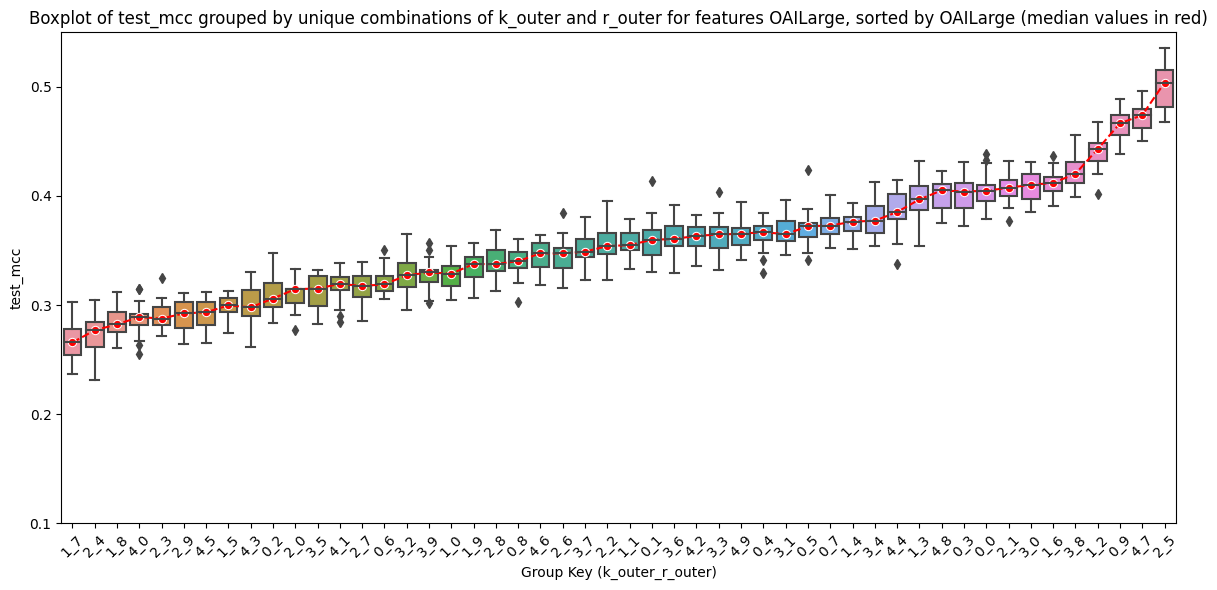

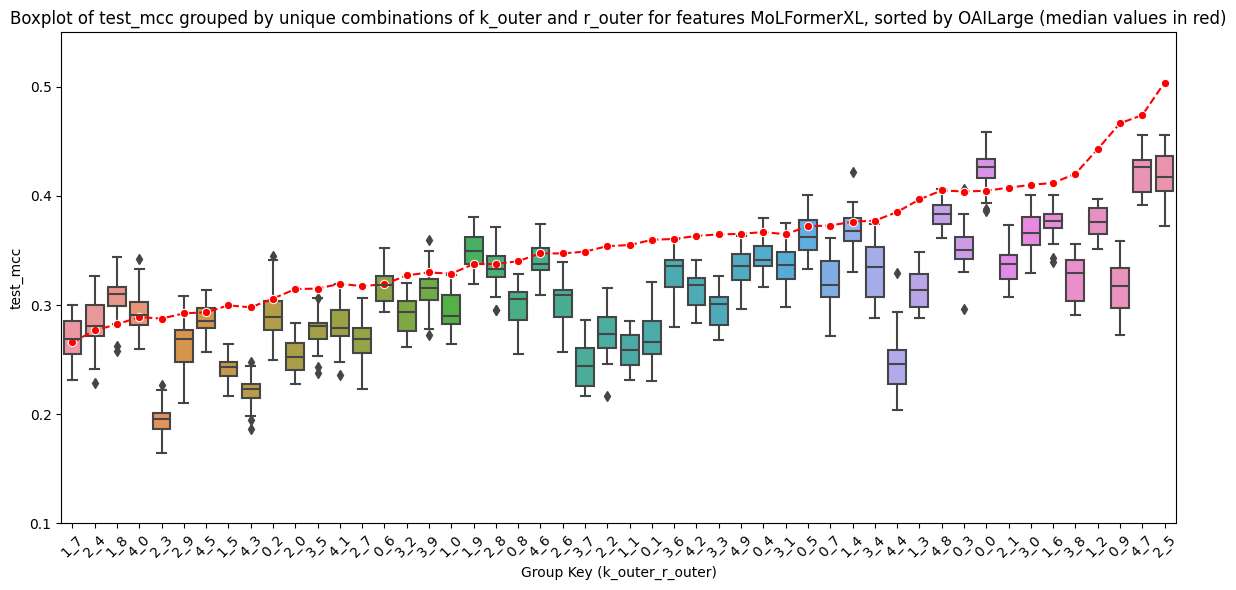

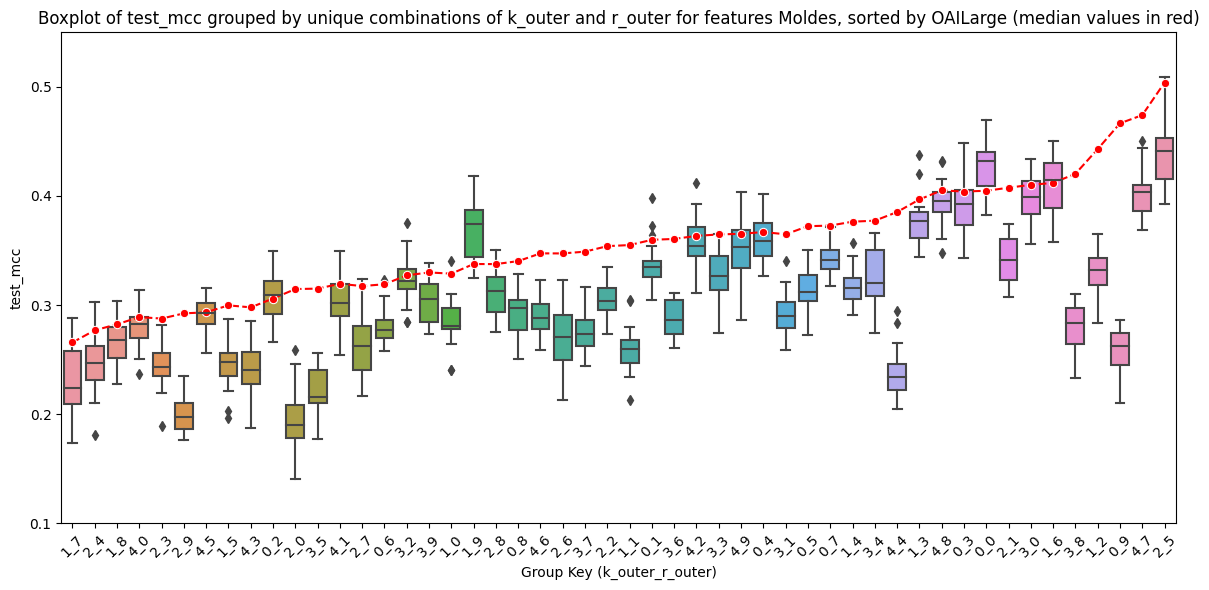

In [52]:
sorting_order = None
median_values= None
for name,dff in zip(namedfs,dfs):
    nice_name = name_dict.get(name,None)
    if nice_name:
        sorting_order,median_values = plot_mcc_boxplots(dff, "test_mcc",nice_name, y_min=0.1, y_max=0.55, sorting_order=sorting_order,median_values=median_values)
